<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/09_unsupervised_learning_k_means_bolbs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Objective
Clustring bolbs dataset using K-means

## Import Dependencies

In [39]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Create Dataset

In [21]:
bolb_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8], [-2.8,  2.8], [-2.8,  1.3]])
bolb_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, n_features=2, centers=bolb_centers, cluster_std=bolb_std, random_state=42)

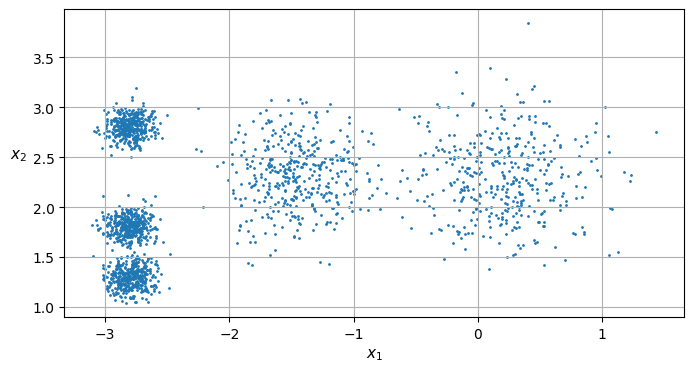

In [27]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=11)
    plt.ylabel("$x_2$", fontsize=11, rotation=0, labelpad=10)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.grid(True)
plt.show()

# K-Means clustering

In [31]:
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

## 1. Prediction

Each instance is asigned to a cluster and the result is stored in `y_pred`. This is the same as `kmeans.labels_`.

In [32]:
y_pred

array([2, 1, 3, ..., 1, 2, 0], dtype=int32)

In [34]:
kmeans.labels_

array([2, 1, 3, ..., 1, 2, 0], dtype=int32)

In [35]:
y_pred == kmeans.labels_

array([ True,  True,  True, ...,  True,  True,  True])

In [36]:
(y_pred == kmeans.labels_).all()

True

In [37]:
y_pred is kmeans.labels_

True

This is an unsupervised learning, meaning that I pretend that I do not know any thing about the true labels generated by `make_bolbs`.

In [33]:
y

array([3, 0, 1, ..., 0, 3, 2])

In [40]:
accuracy_score(y, y_pred)

0.1995

In [41]:
(y == y_pred).mean()

0.1995

It seems 19.95% of the instances are assigned to an incorrect cluster.

## 2. Cluster Centroids

In [43]:
kmeans.cluster_centers_

array([[-2.80372723,  1.80873739],
       [ 0.20925539,  2.30351618],
       [-2.79846237,  2.80004584],
       [-1.4453407 ,  2.32051326],
       [-2.79244799,  1.2973862 ]])

In [86]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)


def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="coolwarm") #plot field
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=0.5, colors='k') #plot boundaries
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=11)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=11, rotation=0)
    else:
        plt.tick_params(labelleft=False)

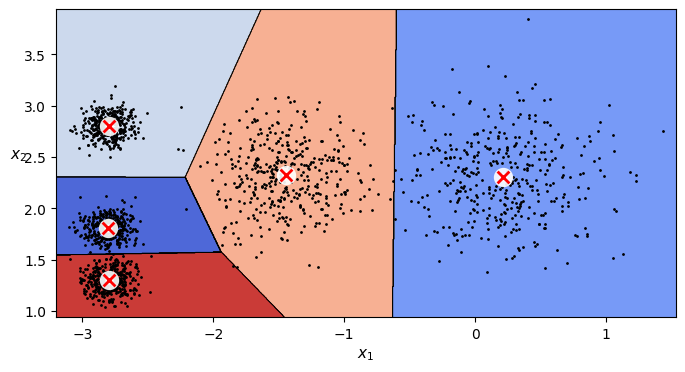

In [87]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

## 3. Predict New Instances

In [90]:
X_new = np.array([[0, 2], [1, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

Let's check the predictions on the plot.

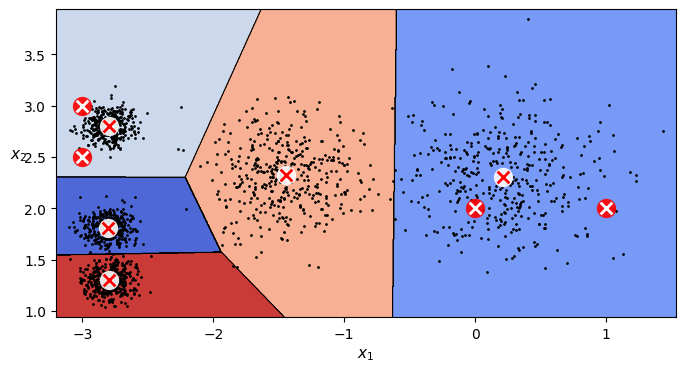

In [96]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plot_centroids(X_new, weights=None, circle_color='r', cross_color='w')
plt.show()

I use my `kmean` model to transform X to a cluster-distance space. In this new space, each dimension is the distance to the cluster centers.

In [97]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.37, 2.91, 1.48, 2.88],
       [3.81, 0.85, 3.88, 2.47, 3.86],
       [1.21, 3.28, 0.28, 1.7 , 1.72],
       [0.72, 3.22, 0.36, 1.56, 1.22]])

Let's check these Eulidian distances.

In [99]:
X_new

array([[ 0. ,  2. ],
       [ 1. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5]])

In [104]:
X_new.shape

(4, 2)

In [101]:
# Construct an array by repeating X_new 1-times along axis 0 (row) and k-times along axis 1 (column)
np.tile(X_new, (1,k))

array([[ 0. ,  2. ,  0. ,  2. ,  0. ,  2. ,  0. ,  2. ,  0. ,  2. ],
       [ 1. ,  2. ,  1. ,  2. ,  1. ,  2. ,  1. ,  2. ,  1. ,  2. ],
       [-3. ,  3. , -3. ,  3. , -3. ,  3. , -3. ,  3. , -3. ,  3. ],
       [-3. ,  2.5, -3. ,  2.5, -3. ,  2.5, -3. ,  2.5, -3. ,  2.5]])

In [103]:
np.tile(X_new, (1,k)).shape

(4, 10)

In [102]:
# Reshape into 3-dim array
np.tile(X_new, (1, k)).reshape(-1, k, 2)

array([[[ 0. ,  2. ],
        [ 0. ,  2. ],
        [ 0. ,  2. ],
        [ 0. ,  2. ],
        [ 0. ,  2. ]],

       [[ 1. ,  2. ],
        [ 1. ,  2. ],
        [ 1. ,  2. ],
        [ 1. ,  2. ],
        [ 1. ,  2. ]],

       [[-3. ,  3. ],
        [-3. ,  3. ],
        [-3. ,  3. ],
        [-3. ,  3. ],
        [-3. ,  3. ]],

       [[-3. ,  2.5],
        [-3. ,  2.5],
        [-3. ,  2.5],
        [-3. ,  2.5],
        [-3. ,  2.5]]])

In [105]:
np.tile(X_new, (1, k)).reshape(-1, k, 2).shape

(4, 5, 2)

-1 in reshape is a placeholder that tells NumPy to infer the size of this dimension automatically based on the other specified dimensions.

In [106]:
kmeans.cluster_centers_

array([[-2.80372723,  1.80873739],
       [ 0.20925539,  2.30351618],
       [-2.79846237,  2.80004584],
       [-1.4453407 ,  2.32051326],
       [-2.79244799,  1.2973862 ]])

In [107]:
kmeans.cluster_centers_.shape

(5, 2)

The operation below subtract the coordinates of each new instance in `X_new` from each cluster centroid by propagating the dimensions.

In [108]:
np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_

array([[[ 2.80372723,  0.19126261],
        [-0.20925539, -0.30351618],
        [ 2.79846237, -0.80004584],
        [ 1.4453407 , -0.32051326],
        [ 2.79244799,  0.7026138 ]],

       [[ 3.80372723,  0.19126261],
        [ 0.79074461, -0.30351618],
        [ 3.79846237, -0.80004584],
        [ 2.4453407 , -0.32051326],
        [ 3.79244799,  0.7026138 ]],

       [[-0.19627277,  1.19126261],
        [-3.20925539,  0.69648382],
        [-0.20153763,  0.19995416],
        [-1.5546593 ,  0.67948674],
        [-0.20755201,  1.7026138 ]],

       [[-0.19627277,  0.69126261],
        [-3.20925539,  0.19648382],
        [-0.20153763, -0.30004584],
        [-1.5546593 ,  0.17948674],
        [-0.20755201,  1.2026138 ]]])

Finally, I use _Frobenius norm_ along axis 2 (see <a href='https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html'>Numpy documentation)</a>.For example, the _Frobenius norm_ for the first instace($[0, 2]$) from the first cluster centroid ($[-2.8037,  1.8087]$) is computed as follows:

$$||A||_F = \left[ \sum_{i,j} abs(a_{i,j})^2\right]^{\frac{1}{2}}$$<br>
$$||A||_F = \sqrt{(-2.8037-0)^2 + (1.8087-2)^2}=2.8102$$

In [109]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2).round(2)

array([[2.81, 0.37, 2.91, 1.48, 2.88],
       [3.81, 0.85, 3.88, 2.47, 3.86],
       [1.21, 3.28, 0.28, 1.7 , 1.72],
       [0.72, 3.22, 0.36, 1.56, 1.22]])

The result matches with the one I got earlier with `kmeans.transform(X_new).round(2)`.

## 4. K-Means Algorithm

In [146]:
kmeans_iter = []
iter_num = 6
for i in range(iter_num):
    kmeans_iter.append(KMeans(n_clusters=k, init='random', n_init=1, max_iter=i+1, random_state=42))
    kmeans_iter[i].fit(X)

In [171]:
def plot_centroids_ax(ax, centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=15, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=0.5, linewidths=12, color=cross_color, zorder=11, alpha=1)


def plot_data_ax(ax, X, label):
    ax.plot(X[:, 0], X[:, 1], 'k.', markersize=2, label=label)
    ax.legend(loc='upper right', fontsize=8)


def plot_decision_boundaries_ax(ax, clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True, label=None):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="coolwarm") #plot field
    ax.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=0.5, colors='k') #plot boundaries
    plot_data_ax(ax, X, label)
    if show_centroids:
        plot_centroids_ax(ax, clusterer.cluster_centers_)
    if show_xlabels:
        ax.set_xlabel("$x_1$", fontsize=11)
    else:
        ax.tick_params(labelbottom=False)
    if show_ylabels:
        ax.set_ylabel("$x_2$", fontsize=11, rotation=0)
    else:
        ax.tick_params(labelleft=False)

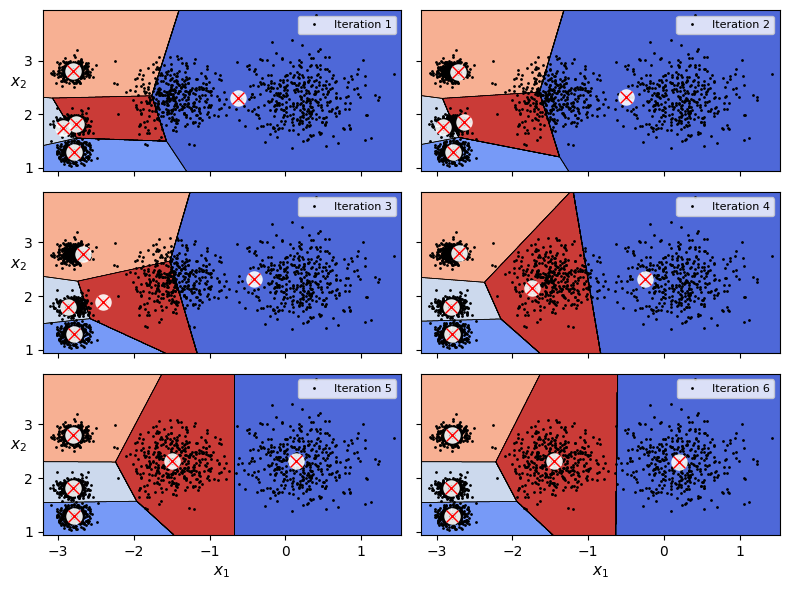

In [176]:
fig, ax = plt.subplots(nrows=iter_num//2, ncols=2, figsize=(8, iter_num), sharex=True, sharey=True)
ax = ax.ravel()
for i in range(iter_num):
    plot_decision_boundaries_ax(ax[i], kmeans_iter[i], X, resolution=1000, show_centroids=True, show_xlabels=(True if i in [iter_num-2, iter_num-1] else False), show_ylabels=(i%2==0), label=f'Iteration {i+1}')


plt.tight_layout()
plt.show()